# Receita Total usando RL

# Rony Ken Nagai           | RM: 551549
# Tomáz Versolato Carballo | RM: 551417

## Introdução

Neste projeto, foi utilizado o conjunto de dados `fundamentals.csv` da Bolsa de Valores de Nova York para criar um modelo de Regressão Linear que prevê a receita total com base no lucro líquido.


## Carregamento e Exploração dos Dados

Foi carregado os dados do arquivo CSV e explorado as primeiras linhas para entender a estrutura do conjunto de dados. E foi decidido usar as colunas `Net Income` e `Total Revenue` para este modelo de estudo.


In [ ]:
import pandas as pd

In [ ]:
fund = pd.read_csv("fundamentals.csv")

In [ ]:
fund.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [ ]:
fund.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [ ]:
data = fund[['Net Income', 'Total Revenue']]

In [ ]:
data = data.dropna()

In [ ]:
data.head()

,Net Income,Total Revenue
0,-1.876000e+09,2.485500e+10
1,-1.834000e+09,2.674300e+10
2,2.882000e+09,4.265000e+10
3,7.610000e+09,4.099000e+10
4,3.876700e+08,6.205003e+09


## Treinamento do Modelo

Foi dividido os dados em conjuntos de treino e teste, e treinado um modelo de Regressão Linear usando `scikit-learn`.

* X_train e y_train são os dados de treino.
* X_test e y_test são os dados de teste.
* test_size=0.2 significa que 20% dos dados serão usados para teste.
* random_state=42 é uma semente para garantir que a divisão seja a mesma toda vez que você executar o código (para reprodutibilidade).
* model.fit(X_train, y_train) ajusta o modelo de Regressão Linear aos dados de treino, encontrando os melhores parâmetros (coeficientes) que minimizam o erro entre as previsões do modelo e os valores reais de y_train.
* model.predict(X_test) usa os parâmetros ajustados durante o treinamento para prever os valores de y para os dados de teste X_test.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
X = data[['Net Income']]
y = data['Total Revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

## Visualização dos Resultados

Por fim, foi criado um gráfico para visualizar a linha de regressão em comparação com os dados reais de teste. O gráfico mostra a relação linear entre o lucro líquido e a receita total.

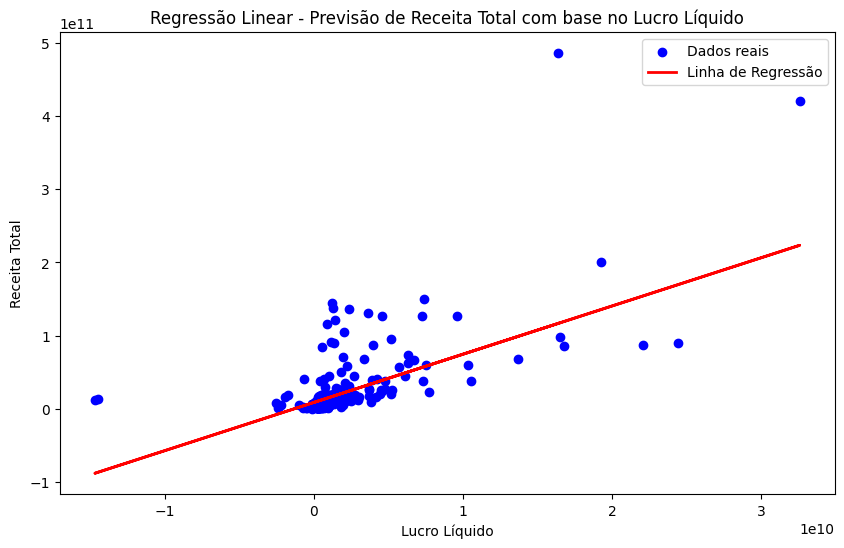

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('Lucro Líquido')
plt.ylabel('Receita Total')
plt.title('Regressão Linear - Previsão de Receita Total com base no Lucro Líquido')
plt.legend()
plt.show()

## Observação Final

O modelo de Regressão Linear permite prever a receita total com base no lucro líquido. A linha de regressão mostra a relação linear entre essas duas variáveis.
